In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sales = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/sales_sample.csv")
sales # last 3 rows are the same

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.728,0.679,8.106
1,2,A,1,2010-03-05,21827.90,False,8.056,0.693,8.106
2,3,B,1,2010-04-02,57258.43,True,16.817,0.718,7.808
3,4,B,2,2010-05-07,17413.94,False,22.528,0.749,7.808
4,3,B,2,2010-06-04,17558.09,False,27.050,0.715,7.808
5,6,C,2,2010-06-04,17558.09,True,27.050,0.715,7.808
6,7,C,3,2010-06-04,17558.09,False,27.050,0.715,7.808
7,7,C,3,2010-06-04,17558.09,False,27.050,0.715,7.808
8,7,C,3,2010-06-04,17558.09,False,27.050,0.715,7.808


# Joining Data
### Inner, Left, Right, and Outer Joins:

![Inner and Outer Joins](https://miro.medium.com/v2/resize:fit:828/format:webp/1*kGuUJxJwsuiLRa5pL3bsCA.png)

## Inner Join
An inner join will only return rows that have matching values in both tables

In [4]:
ward = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/ward.csv")
ward.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [5]:
census = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/census.csv")
census.head()

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [6]:
# Both 'ward' and 'census' DataFrames contain the same column, 'ward', so we will merge them based on that column
# 'census' will be merged on the right side of 'ward'
ward_census = ward.merge(census, on="ward") # OR: right=census
ward_census.head()

,ward,alderman,address_x,zip_x,pop_2000,pop_2010,change,address_y,zip_y
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [7]:
# 'ward' will be merged on the right side of 'census'
census_ward = census.merge(ward, on="ward")
census_ward.head()

,ward,pop_2000,pop_2010,change,address_x,zip_x,alderman,address_y,zip_y
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [8]:
# we can determine suffixes when two columns of both DataFrames have the same name instead of having the '_x' and '_y' suffixes
ward_census = ward.merge(census, on="ward", suffixes=("_ward", "_census"))
ward_census.head()

,ward,alderman,address_ward,zip_ward,pop_2000,pop_2010,change,address_census,zip_census
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


#### One-to-one Relationship
Every row in the right table is related to one and only one row in the right table

→ Every distinct input matches to a distinct output (input = a left row, output = a right row)
-   Example: Each ward has only one population. `ward_census` table represents a one-to-one relationship

#### One-to-many Relationship
Every row in the right table is related to one or more rows in the right table
-   Example:
	1.  A business may have one or multiple owners.
	2.  Each ward has many businesses. `ward_licenses` table represents a one-to-many relationship

In [9]:
# one-to-many example: 
licenses = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/licenses.csv")
print(licenses.shape)
licenses.head()

(10000, 6)


,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616.0
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633.0
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632.0
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609.0
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613.0


In [10]:
print("'ward' shape:", ward.shape, '\n')

ward_licenses = ward.merge(licenses, on="ward", suffixes=("_ward", "_lic"))
print(ward_licenses.shape)
ward_licenses.head()

'ward' shape: (50, 4) 

(10000, 9)


,ward,alderman,address_ward,zip_ward,account,aid,business,address_lic,zip_lic
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622.0
1,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622.0
2,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647.0
3,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622.0
4,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622.0


#### Merging Multiple DataFrames
```
df1.merge(df2, on="col") \
	.merge(df3, on="col") \
	.merge(df4, on="col")
```
Note that we're using Python's backslash line continuation method to add the 2nd and 3rd merge on the next lines. Python will read this as just one line of code. Without this, Python will throw a syntax error since it will parse it as three separate lines of code.

→ **N.B.** Sometimes, you should merge on multiple columns as only one column may not be sufficient to differentiate two entries from each other. This can be done using a list → `on=["col1", "col2"]` 

**Example:**

<img src="https://assets.datacamp.com/production/repositories/5486/datasets/56b5ecb2edcdc896c69effdf05ef65e5454ff996/cta_L_diagram.png" width=450 height=200>

In [11]:
cal = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/cta_calendar.csv")
ridership = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/cta_ridership.csv")
stations = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/stations.csv")

print(cal.head(2), '\n')
print(ridership.head(2), '\n')
print(stations.head(2), '\n')

# "ridership.merge(cal, on=["year", "month", "day"])"   is equivalent to   "ridership.merge(cal)"
# If you don't specify the on argument in the merge function, 
# pandas will attempt to merge the DataFrames using all columns that have the same names in both DataFrames. This is called a natural join.
ridership_cal_stations = ridership.merge(cal, on=["year", "month", "day"]) \
									.merge(stations, on="station_id")
ridership_cal_stations

   year  month  day        day_type
0  2019      1    1  Sunday/Holiday
1  2019      1    2         Weekday 

   station_id  year  month  day  rides
0       40010  2019      1    1    576
1       40010  2019      1    2   1457 

   station_id        station_name                 location
0       40010  Austin-Forest Park  (41.870851, -87.776812)
1       40020         Harlem-Lake  (41.886848, -87.803176) 



,station_id,year,month,day,rides,day_type,station_name,location
0,40010,2019,1,1,576,Sunday/Holiday,Austin-Forest Park,"(41.870851, -87.776812)"
1,40010,2019,1,2,1457,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
2,40010,2019,1,3,1543,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
3,40010,2019,1,4,1621,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
4,40010,2019,1,5,719,Saturday,Austin-Forest Park,"(41.870851, -87.776812)"
...,...,...,...,...,...,...,...,...
3280,41660,2019,12,27,13898,Weekday,Lake/State,"(41.884809, -87.627813)"
3281,41660,2019,12,28,9485,Saturday,Lake/State,"(41.884809, -87.627813)"
3282,41660,2019,12,29,7581,Sunday/Holiday,Lake/State,"(41.884809, -87.627813)"
3283,41660,2019,12,30,15332,Weekday,Lake/State,"(41.884809, -87.627813)"


## Left Join
A left join returns all of the rows from the left table and only those rows from the right table where columns match in both.

In [12]:
movies = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/movies.csv")
taglines = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/taglines.csv")

print(movies.head(2), "\nmovies Shape:", movies.shape, '\n')
print(taglines.head(2), "\ntaglines Shape:", taglines.shape, '\n')

# Type of merge to be performed: how : {'left', 'right', 'outer', 'inner', 'cross'}, default 'inner'
movies_taglines = movies.merge(taglines, on="id", how="left")

movies_taglines

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12 
movies Shape: (4803, 4) 

      id                                         tagline
0  19995                     Enter the World of Pandora.
1    285  At the end of the world, the adventure begins. 
taglines Shape: (3955, 2) 



,id,title,popularity,release_date,tagline
0,257,Oliver Twist,20.415572,2005-09-23,NaN
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.
2,38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.
3,9672,Infamous,3.680896,2006-11-16,There's more to the story than you know
4,12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure
...,...,...,...,...,...
4798,3089,Red River,5.344815,1948-08-26,Big as the men who faced this challenge! Bold ...
4799,11934,The Hudsucker Proxy,14.188982,1994-03-11,They took him for a fall guy... but he threw t...
4800,13807,Exiled,8.486390,2006-09-06,NaN
4801,73873,Albert Nobbs,7.802245,2011-12-21,A man with a secret. A woman with a dream.


## Right Join
It will return all of the rows from the right table and includes only those rows from the left table that have matching values.

It is the mirror opposite of the left join.

In [13]:
genres = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/movie_to_genres.csv")
tv_genre = genres[genres["genre"] == "TV Movie"]

print(movies.head(2), "\nmovies Shape:", movies.shape, '\n')
print(tv_genre.head(2), "\ntv_genre Shape:", taglines.shape, '\n')

# we want to merge on the column containing movies' IDs, but it's called 'id' in in the 'movies' table and 'movie_id' in the 'tv_genre' table,
# so we should use 'left_on' and 'right_on' arguments
tv_movies = movies.merge(tv_genre, how="right", left_on="id", right_on="movie_id")
tv_movies

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12 
movies Shape: (4803, 4) 

      movie_id     genre
4998     10947  TV Movie
5994     13187  TV Movie 
tv_genre Shape: (3955, 2) 



,id,title,popularity,release_date,movie_id,genre
0,10947,High School Musical,16.536374,2006-01-20,10947,TV Movie
1,13187,A Charlie Brown Christmas,8.701183,1965-12-09,13187,TV Movie
2,22488,Love's Abiding Joy,1.128559,2006-10-06,22488,TV Movie
3,78814,We Have Your Husband,0.102003,2011-11-12,78814,TV Movie
4,153397,Restless,0.812776,2012-12-07,153397,TV Movie
5,158150,How to Fall in Love,1.923514,2012-07-21,158150,TV Movie
6,205321,Sharknado,20.466433,2013-07-11,205321,TV Movie
7,231617,"Signed, Sealed, Delivered",1.444476,2013-10-13,231617,TV Movie


## Outer Join
An outer join will return all of the rows from both tables regardless if there is a match between the tables.

This join type is useful for finding unmatched data between two tables

In [14]:
family_genre = genres[genres["genre"] == "Family"]
comedy_genre = genres[genres["genre"] == "Comedy"]

family_comedy_genres = family_genre.merge(comedy_genre, on="movie_id", how="outer", suffixes=("_fam", "_com"))
family_comedy_genres

,movie_id,genre_fam,genre_com
0,5,NaN,Comedy
1,12,Family,NaN
2,13,NaN,Comedy
3,35,Family,Comedy
4,68,NaN,Comedy
...,...,...,...
1931,385636,NaN,Comedy
1932,386826,NaN,Comedy
1933,417859,Family,NaN
1934,426469,Family,Comedy


## Cross Join (a.k.a Cartesian Product)
A cross join combines every row of the first DataFrame with every row of the second DataFrame. This means that if the first DataFrame has $m$ rows and the second DataFrame has $n$ rows, the resulting DataFrame will have $m * n$ rows.

**When to Use:** When you need to generate all possible combinations of two datasets for analysis

**Example:** `df1_df2 = df1.merge(df2, how="cross")`

# Merging a Table to Itself (Self Join)
**When to Use:**
-   Hierarchical relationship, like employee and manager 
-   Sequential relationships such as logistic movements 
-   Graph data, such as networks of friends

In [15]:
""" releasing a sequel to a movie is like releasing a 2nd PART of the movie
  
It contains a column for movie id, title, and sequel. The sequel number refers to the movie id that is a sequel to the original movie. 
For example, in the second row the movie is titled Toy Story, and has an id equal to 862. The sequel number of this row is 863. 
This is the movie id for Toy Story 2, the sequel to Toy Story. 
If we continue, 10193 is the movie id Toy Story 3 which is the sequel for Toy Story 2.
"""
sequels = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/sequels.csv")
sequels

,id,title,sequel
0,19995,Avatar,NaN
1,862,Toy Story,863.0
2,863,Toy Story 2,10193.0
3,597,Titanic,NaN
4,24428,The Avengers,NaN
...,...,...,...
4798,133931,Zambezia,NaN
4799,309503,Zipper,NaN
4800,34592,ZMD: Zombies of Mass Destruction,NaN
4801,206213,Zombie Hunter,NaN


In [16]:
original_sequels = sequels.merge(sequels, left_on="sequel", right_on="id", suffixes=("_org", "_seq"))
print(original_sequels)
original_sequels[["title_org", "title_seq"]] 

    id_org                                          title_org  sequel_org  \
0      862                                          Toy Story       863.0   
1      863                                        Toy Story 2     10193.0   
2      675          Harry Potter and the Order of the Phoenix       767.0   
3      121              The Lord of the Rings: The Two Towers       122.0   
4      120  The Lord of the Rings: The Fellowship of the Ring       121.0   
..     ...                                                ...         ...   
85      76                                     Before Sunrise        80.0   
86    2292                                             Clerks      2295.0   
87    9367                                        El Mariachi      8068.0   
88    8374                                The Boondock Saints     22821.0   
89   16186                         Diary of a Mad Black Woman     16781.0   

    id_seq                                      title_seq  sequel_seq  
0  

,title_org,title_seq
0,Toy Story,Toy Story 2
1,Toy Story 2,Toy Story 3
2,Harry Potter and the Order of the Phoenix,Harry Potter and the Half-Blood Prince
3,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King
4,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers
...,...,...
85,Before Sunrise,Before Sunset
86,Clerks,Clerks II
87,El Mariachi,Desperado
88,The Boondock Saints,The Boondock Saints II: All Saints Day


# Merging on Index

In [17]:
print(movies.head(2), '\n')
print(taglines.head(2), '\n')
movies_taglines.head(2) # it resulted from merging 'movies' and 'taglines' tables on the 'id' column

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12 

      id                                         tagline
0  19995                     Enter the World of Pandora.
1    285  At the end of the world, the adventure begins. 



,id,title,popularity,release_date,tagline
0,257,Oliver Twist,20.415572,2005-09-23,NaN
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.


In [18]:
movies.set_index("id", inplace=True)
taglines.set_index("id", inplace=True)
# let's merge on the 'id' index this time
movies_taglines = movies.merge(taglines, on="id", how="left") 

print(movies.head(2), '\n')
print(taglines.head(2), '\n')
movies_taglines.head(2) # it resulted from merging 'movies' and 'taglines' tables on the 'id' index
# the merge method accepts column names or index names

                      title  popularity release_date
id                                                  
257            Oliver Twist   20.415572   2005-09-23
14290  Better Luck Tomorrow    3.877036   2002-01-12 

                                              tagline
id                                                   
19995                     Enter the World of Pandora.
285    At the end of the world, the adventure begins. 



,title,popularity,release_date,tagline
id,,,,
257,Oliver Twist,20.415572,2005-09-23,NaN
14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.


### MultiIndex Merge
We pass in a list of index level names to the `on` argument, just like we did when merging on multiple columns → `on=["idx1", "idx2"]` 

### Merge on Indexes That have the Same Content, but Different Names (`left_index` and `right_index`)

In [19]:
genres.set_index("movie_id", inplace=True)
print(movies.head(2), '\n')
print(genres.head(2), '\n')

                      title  popularity release_date
id                                                  
257            Oliver Twist   20.415572   2005-09-23
14290  Better Luck Tomorrow    3.877036   2002-01-12 

           genre
movie_id        
5          Crime
5         Comedy 



In [20]:
# Error: due to specifying both (left_on and left_index) and both (right_on and right_index) in the merge function call. 
# According to the error message, you can use either (left_on or left_index) and (right_on or right_index), but not both simultaneously.
# movies_genres = movies.merge(genres, left_on="id", left_index=True, right_on="movie_id", right_index=True)

# Option 1: If you need to use the 'id' and 'movie_id' columns from left and right DataFrames respectively
# movies_genres = movies.merge(genres, left_on="id", right_on="movie_id")

# Option 2: If you want to merge based on the index of the left DataFrame and a column in the right DataFrame
# movies_genres = movies.merge(genres, left_index=True, right_on="movie_id")

# Option 3: If you want to merge based on a column in the left DataFrame and the index of the right DataFrame 
# movies_genres = movies.merge(genres, left_on="id", right_index=True)

# Option 4: If both DataFrames should use their indices for merging
movies_genres = movies.merge(genres, left_index=True, right_index=True)
movies_genres

,title,popularity,release_date,genre
id,,,,
257,Oliver Twist,20.415572,2005-09-23,Crime
257,Oliver Twist,20.415572,2005-09-23,Drama
257,Oliver Twist,20.415572,2005-09-23,Family
14290,Better Luck Tomorrow,3.877036,2002-01-12,Crime
14290,Better Luck Tomorrow,3.877036,2002-01-12,Drama
...,...,...,...,...
13807,Exiled,8.486390,2006-09-06,Crime
13807,Exiled,8.486390,2006-09-06,Action
73873,Albert Nobbs,7.802245,2011-12-21,Drama


# Filtering Joins
**Mutating vs Filtering joins:**

So far, we have only worked with mutating joins, which combines data from two tables. 

However, filtering joins filter observations from one table based on whether or not they match an observation in another table.

## Semi Join
filters the left table down to those observations that have a match (inner join matching) in the right table.

**Retain all rows in df1 that have a match in df2:**

<img src="https://stat545.stat.ubc.ca/tutorials/tibble_join/images/semi_join.png" alt="antiJoin" width="600"/>

In [21]:
genres.reset_index(inplace=True)
movies.reset_index(inplace=True)

# dummy DataFrame: every genre has an ID 
genresIDs = genres.drop_duplicates(subset="genre")
genresIDs.rename(columns={"movie_id":"genre_id"}, inplace=True)
print(genresIDs, '\n')

# contains the highest top 1000 ratings (a more accurate calculation should be used)
top_ratings = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/ratings.csv").sort_values(["vote_average", "vote_count"], ascending=[False, False]).iloc[:1000]
top_ratings

      genre_id            genre
0            5            Crime
1            5           Comedy
2           11  Science Fiction
3           11           Action
4           11        Adventure
5           12           Family
6           12        Animation
8           13          Romance
9           13            Drama
12          16            Music
16          18         Thriller
18          18          Fantasy
29          25              War
32          33          Western
47          62          Mystery
77          79          History
209        170           Horror
370        291      Documentary
2797      7509          Foreign
4998     10947         TV Movie 



C:\Users\moham\AppData\Local\Temp\ipykernel_13024\1681877902.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genresIDs.rename(columns={"movie_id":"genre_id"}, inplace=True)


,id,vote_average,vote_count
4247,361505,10.0,2.0
3519,89861,10.0,1.0
4045,78373,10.0,1.0
4662,40963,10.0,1.0
3992,346081,9.5,2.0
...,...,...,...
181,9502,6.9,3145.0
145,652,6.9,2759.0
2330,10625,6.9,2320.0
558,35,6.9,2264.0


In [22]:
# what if I want to know the genres of movies with the highest ratings ? → Semi Join
# Step 1:
genresIDs_ratings = genresIDs.merge(top_ratings, left_on="genre_id", right_on="id")
genresIDs_ratings

,genre_id,genre,id,vote_average,vote_count
0,11,Science Fiction,11,8.1,6624.0
1,11,Action,11,8.1,6624.0
2,11,Adventure,11,8.1,6624.0
3,12,Family,12,7.6,6122.0
4,12,Animation,12,7.6,6122.0
5,13,Romance,13,8.2,7927.0
6,13,Drama,13,8.2,7927.0
7,16,Music,16,7.6,377.0
8,18,Thriller,18,7.3,3885.0
9,18,Fantasy,18,7.3,3885.0


In [23]:
# Step 2:
# .isin() method compares every 'movie_id' in the genres table to the 'movie_id' in the genres_ratings table. and return a boolean Series
top_genersIDs = genresIDs[genresIDs["genre_id"].isin(genresIDs_ratings["genre_id"])]
top_genersIDs

,genre_id,genre
2,11,Science Fiction
3,11,Action
4,11,Adventure
5,12,Family
6,12,Animation
8,13,Romance
9,13,Drama
12,16,Music
16,18,Thriller
18,18,Fantasy


## Anti Join (Exclusive Join)
returns the observations in the left table that do not have a matching observation in the right table <br>
You can think of anti join as the inverse of a semi join <br>

**Retain all rows in df1 that do not have a match in df2:**

<img src="https://stat545.stat.ubc.ca/notes/notes-a11/images/anti_join.png" alt="antiJoin" width="600"/>

In [24]:
# what if I want to know the genres of movies with the lowest ratings (not highest) ? → anti Join
non_top_genersIDs = genresIDs[~ genresIDs["genre_id"].isin(genresIDs_ratings["genre_id"])]
non_top_genersIDs

,genre_id,genre
0,5,Crime
1,5,Comedy
29,25,War
2797,7509,Foreign
4998,10947,TV Movie


In [25]:
# Another way for an anti join (more complex)
# Step 1:
# 'indicator=True' shows the source of each observation (row), telling whether it's from left_only, right_only, or both tables
genresIDs_ratings = genresIDs.merge(top_ratings, left_on="genre_id", right_on="id", how="left", indicator=True)
genresIDs_ratings

,genre_id,genre,id,vote_average,vote_count,_merge
0,5,Crime,NaN,NaN,NaN,left_only
1,5,Comedy,NaN,NaN,NaN,left_only
2,11,Science Fiction,11.0,8.1,6624.0,both
3,11,Action,11.0,8.1,6624.0,both
4,11,Adventure,11.0,8.1,6624.0,both
5,12,Family,12.0,7.6,6122.0,both
6,12,Animation,12.0,7.6,6122.0,both
7,13,Romance,13.0,8.2,7927.0,both
8,13,Drama,13.0,8.2,7927.0,both
9,16,Music,16.0,7.6,377.0,both


In [26]:
# Step 2:
# select the 'genre_id' Series that contains left_only genres
genreID_Series = genresIDs_ratings.loc[genresIDs_ratings["_merge"] == "left_only", "genre_id"]

# Step 3: filtering
non_top_genersIDs = genresIDs[genresIDs["genre_id"].isin(genreID_Series)]
non_top_genersIDs

,genre_id,genre
0,5,Crime
1,5,Comedy
29,25,War
2797,7509,Foreign
4998,10947,TV Movie


# Concatenate DataFrames together vertically
we have only discussed how to merge two tables, which mainly grows them horizontally. But what if we wanted to grow them vertically? We can use the `concat` method to concatenate, or stick tables together, vertically (`pd.concat(axis=0)`) or horizontally (`pd.concat(axis=1)`)

In [27]:
tv_movies = genres[genres["genre"] == "TV Movie"].head(5)
foreign_movies = genres[genres["genre"] == "Foreign"].head(5)
western_movies = genres[genres["genre"] == "Western"].head(5)

print(tv_movies, '\n')
print(foreign_movies, '\n')
print(western_movies)
# Notice that the column headers are the same

       movie_id     genre
4998      10947  TV Movie
5994      13187  TV Movie
7443      22488  TV Movie
10061     78814  TV Movie
10790    153397  TV Movie 

      movie_id    genre
2797      7509  Foreign
6207     13898  Foreign
6442     14608  Foreign
6461     14652  Foreign
6656     15699  Foreign 

     movie_id    genre
32         33  Western
367       288  Western
428       335  Western
458       391  Western
505       429  Western


In [28]:
# To concatenate vertically, the axis argument should be set to 0, but 0 is the default, so we don't need to explicitly write this
pd.concat([tv_movies, foreign_movies, western_movies])

,movie_id,genre
4998,10947,TV Movie
5994,13187,TV Movie
7443,22488,TV Movie
10061,78814,TV Movie
10790,153397,TV Movie
2797,7509,Foreign
6207,13898,Foreign
6442,14608,Foreign
6461,14652,Foreign
6656,15699,Foreign


In [29]:
# If the index contains no valuable information, then we can ignore it in the concat method by setting ignore_index to True. 
# The result is that the index will go from 0 to n-1.
pd.concat([tv_movies, foreign_movies, western_movies], ignore_index=True)

,movie_id,genre
0,10947,TV Movie
1,13187,TV Movie
2,22488,TV Movie
3,78814,TV Movie
4,153397,TV Movie
5,7509,Foreign
6,13898,Foreign
7,14608,Foreign
8,14652,Foreign
9,15699,Foreign


### Setting labels to original tables:
We can provide a list of labels to the keys argument. Make sure that `ignore_index` argument is `False` (False is the default), since you can't add a key and ignore the index at the same time. This results in a table with a multi-index, with the label on the first level.

In [30]:
pd.concat([tv_movies, foreign_movies, western_movies], keys=["TV", "Foreign", "Western"])

movie_id     genre
TV      4998      10947  TV Movie
        5994      13187  TV Movie
        7443      22488  TV Movie
        10061     78814  TV Movie
        10790    153397  TV Movie
Foreign 2797       7509   Foreign
        6207      13898   Foreign
        6442      14608   Foreign
        6461      14652   Foreign
        6656      15699   Foreign
Western 32           33   Western
        367         288   Western
        428         335   Western
        458         391   Western
        505         429   Western

### Concatenate Tables with Different Column Names
The `pd.concat()` method by default will include all of the columns

In [31]:
tv_movies["Revenue"] = [x for x in range(1000, 1000 * len(tv_movies) + 1, 1000)]
print(tv_movies, '\n')
print(foreign_movies, '\n')

pd.concat([tv_movies, foreign_movies])

       movie_id     genre  Revenue
4998      10947  TV Movie     1000
5994      13187  TV Movie     2000
7443      22488  TV Movie     3000
10061     78814  TV Movie     4000
10790    153397  TV Movie     5000 

      movie_id    genre
2797      7509  Foreign
6207     13898  Foreign
6442     14608  Foreign
6461     14652  Foreign
6656     15699  Foreign 



,movie_id,genre,Revenue
4998,10947,TV Movie,1000.0
5994,13187,TV Movie,2000.0
7443,22488,TV Movie,3000.0
10061,78814,TV Movie,4000.0
10790,153397,TV Movie,5000.0
2797,7509,Foreign,NaN
6207,13898,Foreign,NaN
6442,14608,Foreign,NaN
6461,14652,Foreign,NaN
6656,15699,Foreign,NaN


In [32]:
# the 'sort' arg will alphabetically sort the different column names in the result 
pd.concat([tv_movies, foreign_movies], sort=True)

,Revenue,genre,movie_id
4998,1000.0,TV Movie,10947
5994,2000.0,TV Movie,13187
7443,3000.0,TV Movie,22488
10061,4000.0,TV Movie,78814
10790,5000.0,TV Movie,153397
2797,NaN,Foreign,7509
6207,NaN,Foreign,13898
6442,NaN,Foreign,14608
6461,NaN,Foreign,14652
6656,NaN,Foreign,15699


In [33]:
print(tv_movies, '\n')
print(foreign_movies, '\n')

# If we only want the matching columns between tables, we can set the 'join' argument to "inner". 
# Its default value is equal to "outer", which is why concat by default will include all of the columns
pd.concat([tv_movies, foreign_movies], join="inner")

       movie_id     genre  Revenue
4998      10947  TV Movie     1000
5994      13187  TV Movie     2000
7443      22488  TV Movie     3000
10061     78814  TV Movie     4000
10790    153397  TV Movie     5000 

      movie_id    genre
2797      7509  Foreign
6207     13898  Foreign
6442     14608  Foreign
6461     14652  Foreign
6656     15699  Foreign 



,movie_id,genre
4998,10947,TV Movie
5994,13187,TV Movie
7443,22488,TV Movie
10061,78814,TV Movie
10790,153397,TV Movie
2797,7509,Foreign
6207,13898,Foreign
6442,14608,Foreign
6461,14652,Foreign
6656,15699,Foreign


# Verifying integrity
When merging two tables, we might expect the tables to have a **one-to-one** relationship. However, one of the columns we are merging on may have a duplicated value, which will turn the relationship into a **one-to-many**. When concatenating tables vertically, if a record exists in both tables, we might unintentionally create duplicate records. The `validate` and `verify_integrity` arguments of the `merge` and `concat` methods respectively will allow us to verify the data.

1. The `validate` argument in the `merge` method could be equal to (by default is `None`):
	-   "**one_to_one**" or "**1:1**": check if merge keys are unique in both left and right datasets
	-   "**one_to_many**" or "**1:m**": check if merge keys are unique in left dataset
	-   "**many_to_one**" or "**m:1**": check if merge keys are unique in right dataset
	-   "**many_to_many**" or "**m:m**": allowed, but does not result in checks

2. The `verify_integrity` argument in the `concat` function could be equal to (by default is `False`):
	-   `True`: checks whether the new concatenated index (not the columns) contains duplicates

In [34]:
# 'ward_licenses' represents a one-to-many relationship as every ward has many businesses
try:
	ward_licenses = ward.merge(licenses, on="ward", suffixes=("_ward", "_lic"), validate="1:1")
	print("Merge successful!")
except pd.errors.MergeError as e:
	print("Merge Error!!", e)
except Exception as e:
	print("An unexpected error occurred:", e)
else:
	print("No errors during merge.")

Merge Error!! Merge keys are not unique in right dataset; not a one-to-one merge


In [35]:
# Notice that both DataFrames has an invoice id of 9 (repeated record in the new concatenated index)
invoice_march = pd.DataFrame({"iid": [7, 8, 9], "invoice_date": ["2009-02-01", "2009-02-02", "2009-02-03"]})
invoice_april = pd.DataFrame({"iid": [9, 10, 11], "invoice_date": ["2009-03-04", "2009-03-05", "2009-03-06"]})

try:
	pd.concat([invoice_march, invoice_april], verify_integrity=True)
	print("Concatenation successful!")
except ValueError as e:
	print("Value Error Description:", e)
except Exception as e:
	print("An unexpected error occurred:", e)
else:
	print("No errors during concatenation")
finally:
	print('\n', pd.concat([invoice_march, invoice_april], verify_integrity=False))

Value Error Description: Indexes have overlapping values: Index([0, 1, 2], dtype='int64')

    iid invoice_date
0    7   2009-02-01
1    8   2009-02-02
2    9   2009-02-03
0    9   2009-03-04
1   10   2009-03-05
2   11   2009-03-06


# `merge_ordered()` Method

![photo](https://assets.datacamp.com/production/repositories/5486/datasets/9636bb4e686203895b8b76b4e02674c4334a4057/merge_orderTable.png)
The results are similar to the standard merge method with an outer join, but here that the results are sorted. The sorted results make this a useful method for **ordered or time-series data**. <br><br><br>

![comparison](https://images.squarespace-cdn.com/content/v1/618f1949e28d5e64417a9ba1/1638291789403-PUG3LZLVCPRJ5QEHL1CI/Untitled+picture.png)
<br> <br> <br>
**→ N.B.** The resulted DataFrame is sorted based on the value assigned to the `on` argument. So if `on=["col1", "col2"]`, then it will be sorted by `"col1"`then `"col2"`

In [36]:
apple = pd.DataFrame({
	"date": ["2007-02-01", "2007-03-01", "2007-04-01", "2007-05-01", "2007-06-01"],
	"close": [12.087143, 13.272857, 14.257143, 17.312857, 17.434286]
					  })
macdonald = pd.DataFrame({
	"date": ["2007-01-01", "2007-02-01", "2007-03-01", "2007-04-01", "2007-05-01"],
	"close": [44.349998, 43.689999, 45.049999, 48.279999, 50.549999]
					  })

pd.merge_ordered(apple, macdonald, on="date", suffixes=("_app", "_mac"))

,date,close_app,close_mac
0,2007-01-01,NaN,44.349998
1,2007-02-01,12.087143,43.689999
2,2007-03-01,13.272857,45.049999
3,2007-04-01,14.257143,48.279999
4,2007-05-01,17.312857,50.549999
5,2007-06-01,17.434286,NaN


## Forward Filling
1. It fills missing values in the merged dataset by propagating the last valid observation forward.
2. It's particularly useful when dealing with **financial data or other time series** where carrying forward the last known value is a reasonable assumption.

In [37]:
# We can fill in this missing data using a technique called forward filling. 
# It will interpolate missing data by filling the missing values with the previous value.
app_mac = pd.merge_ordered(apple, macdonald, on="date", suffixes=("_app", "_mac"), fill_method="ffill")
app_mac
# Notice the missing value for Apple in the first row is still missing 
# since there isn't a row before the first row to copy into the missing value for Apple.

,date,close_app,close_mac
0,2007-01-01,NaN,44.349998
1,2007-02-01,12.087143,43.689999
2,2007-03-01,13.272857,45.049999
3,2007-04-01,14.257143,48.279999
4,2007-05-01,17.312857,50.549999
5,2007-06-01,17.434286,50.549999


In [38]:
# Compute pairwise correlation of columns, excluding NA/null values
app_mac[["close_app", "close_mac"]].corr()

,close_app,close_mac
close_app,1.000000,0.965958
close_mac,0.965958,1.000000


# `merge_asof()` Method
![photo](https://images.squarespace-cdn.com/content/v1/618f1949e28d5e64417a9ba1/1638828211632-1IC1XCTM2RZ2Y17YPUNI/Untitled+picture.png)

**Notes:** 
-   The nearest value of $x$ is the greatest value $y$ that holds this condition: $(y \leq x)$ 
	-   if the `direction` argument is set to `"forward"`, then the nearest value of $x$ is the samllest value $y$ that holds this condition: $(y \geq x)$ 
	-   if the `direction` argument is set to `"nearest"`, then the nearest value of $x$ is the value $y$ with the closest absolute distance whether $y \geq x$ OR $y \leq x$
	-   `direction="backward"` by default 
-   Merged `on` columns must be sorted means that the data inside these columns must be comparable (we can compare them using `<`, `>`, and `=` operators)


### When to Use:
1. Time Series Data with Uneven Sampling:

	Real-world data from sensors or transactions often doesn't have perfectly aligned timestamps. One DataFrame might have readings every minute, while another might capture events every few hours. `merge_asof()` helps bridge these gaps.

2. Time-Series Training Sets:

	When creating training sets for time-series models, it's crucial to avoid "future peeking." This means the model shouldn't be able to use information from future events to predict current ones.
	`merge_asof()` helps maintain this integrity. By finding the data point in the other DataFrame that falls before or at the same time as the current point in the left DataFrame, it ensures the model only sees past information for prediction.

In [39]:
print(apple, '\n')
print(macdonald, '\n')

# This step is necessary if the columns you want to merge on aren't comparable
apple["date"] = pd.to_datetime(apple["date"])
macdonald["date"] = pd.to_datetime(macdonald["date"])

# Notice that the '2007-06-01' date entry doesn't exist in the 'macdonald' DataFrame; 
# however, the 'close_mac' cell corresponding to it is filled using the value with the nearest date, '2007-05-01'
pd.merge_asof(apple, macdonald, on="date", suffixes=("_app", "_mac"))

         date      close
0  2007-02-01  12.087143
1  2007-03-01  13.272857
2  2007-04-01  14.257143
3  2007-05-01  17.312857
4  2007-06-01  17.434286 

         date      close
0  2007-01-01  44.349998
1  2007-02-01  43.689999
2  2007-03-01  45.049999
3  2007-04-01  48.279999
4  2007-05-01  50.549999 



,date,close_app,close_mac
0,2007-02-01,12.087143,43.689999
1,2007-03-01,13.272857,45.049999
2,2007-04-01,14.257143,48.279999
3,2007-05-01,17.312857,50.549999
4,2007-06-01,17.434286,50.549999


In [40]:
# the 'close_mac' cell corresponding to the '2007-06-01' cell is NaN as there isn't a date in the macdonald DataFrame that is >= '2007-06-01'
# As a result, the nearest value isn't found! 
pd.merge_asof(apple, macdonald, on="date", suffixes=("_app", "_mac"), direction="forward")

,date,close_app,close_mac
0,2007-02-01,12.087143,43.689999
1,2007-03-01,13.272857,45.049999
2,2007-04-01,14.257143,48.279999
3,2007-05-01,17.312857,50.549999
4,2007-06-01,17.434286,NaN


In [41]:
pd.merge_asof(apple, macdonald, on="date", suffixes=("_app", "_mac"), direction="nearest")

,date,close_app,close_mac
0,2007-02-01,12.087143,43.689999
1,2007-03-01,13.272857,45.049999
2,2007-04-01,14.257143,48.279999
3,2007-05-01,17.312857,50.549999
4,2007-06-01,17.434286,50.549999


#### Using `merge_asof()` to Study Stocks
##### Story:
You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). **You want to know how the price change of the two other banks compare to JP Morgan**. Therefore, you will need to merge these three logs into one table. Afterward, you will use the pandas .diff() method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

In [42]:
jpm = pd.DataFrame({
	"date_time": [
		"2017-11-17 15:35:17", "2017-11-17 15:40:04", "2017-11-17 15:45:01",
		"2017-11-17 15:50:55", "2017-11-17 15:55:00", "2017-11-17 16:00:30",
		"2017-11-17 16:05:07", "2017-11-17 16:10:08", "2017-11-17 16:15:11",
		"2017-11-17 16:20:29", "2017-11-17 16:25:25", "2017-11-17 16:30:53",
		"2017-11-17 16:35:11", "2017-11-17 16:40:44", "2017-11-17 16:45:52",
		"2017-11-17 16:50:37", "2017-11-17 16:55:02"
	],
	"close": [
		98.120, 98.180, 97.731, 97.740, 97.815, 98.020, 97.800, 97.840,
		97.710, 97.760, 97.820, 97.950, 97.990, 98.060, 98.050, 98.110, 98.180
	]
})

wells = pd.DataFrame({
	"date_time": [
		"2017-11-17 15:35:08", "2017-11-17 15:40:00", "2017-11-17 15:45:32",
		"2017-11-17 15:50:07", "2017-11-17 15:55:00", "2017-11-17 16:00:30",
		"2017-11-17 16:05:52", "2017-11-17 16:10:22", "2017-11-17 16:15:43",
		"2017-11-17 16:20:07", "2017-11-17 16:25:13", "2017-11-17 16:30:04",
		"2017-11-17 16:35:32", "2017-11-17 16:40:09", "2017-11-17 16:45:24",
		"2017-11-17 16:50:28", "2017-11-17 16:55:42"
	],
	"close": [
		54.323, 54.320, 54.190, 54.170, 54.184, 54.265, 54.200, 54.155,
		54.190, 54.205, 54.230, 54.220, 54.220, 54.280, 54.240, 54.170, 54.180
	]
})

bac = pd.DataFrame({
	"date_time": [
		"2017-11-17 15:35:17", "2017-11-17 15:40:06", "2017-11-17 15:45:05",
		"2017-11-17 15:50:34", "2017-11-17 15:55:06", "2017-11-17 16:00:18",
		"2017-11-17 16:05:20", "2017-11-17 16:10:05", "2017-11-17 16:15:07",
		"2017-11-17 16:20:29", "2017-11-17 16:25:00", "2017-11-17 16:30:18",
		"2017-11-17 16:35:08", "2017-11-17 16:40:46", "2017-11-17 16:45:55",
		"2017-11-17 16:50:05", "2017-11-17 16:55:02"
	],
	"close": [
		26.552, 26.552, 26.388, 26.378, 26.383, 26.452, 26.373, 26.388,
		26.369, 26.388, 26.467, 26.482, 26.492, 26.527, 26.522, 26.547, 26.567
	]
})

jpm["date_time"] = pd.to_datetime(jpm["date_time"])
wells["date_time"] = pd.to_datetime(wells["date_time"])
bac["date_time"] = pd.to_datetime(bac["date_time"])

jpm_wells = pd.merge_asof(jpm, wells, on="date_time", suffixes=("_jpm", ''))
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on="date_time", suffixes=("_wells", '_bac'))

print(jpm_wells_bac, '\n')

# .diff() calculates the difference of a DataFrame element compared with another element in the DataFrame (default is element in previous row)
price_diff = jpm_wells_bac.diff()
price_diff
# NaN: Stands for "Not a Number"
# NaT: Stands for "Not a Time"

             date_time  close_jpm  close_wells  close_bac
0  2017-11-17 15:35:17     98.120       54.323     26.552
1  2017-11-17 15:40:04     98.180       54.320     26.552
2  2017-11-17 15:45:01     97.731       54.320     26.552
3  2017-11-17 15:50:55     97.740       54.170     26.378
4  2017-11-17 15:55:00     97.815       54.184     26.378
5  2017-11-17 16:00:30     98.020       54.265     26.452
6  2017-11-17 16:05:07     97.800       54.265     26.452
7  2017-11-17 16:10:08     97.840       54.200     26.388
8  2017-11-17 16:15:11     97.710       54.155     26.369
9  2017-11-17 16:20:29     97.760       54.205     26.388
10 2017-11-17 16:25:25     97.820       54.230     26.467
11 2017-11-17 16:30:53     97.950       54.220     26.482
12 2017-11-17 16:35:11     97.990       54.220     26.492
13 2017-11-17 16:40:44     98.060       54.280     26.492
14 2017-11-17 16:45:52     98.050       54.240     26.527
15 2017-11-17 16:50:37     98.110       54.170     26.547
16 2017-11-17 

,date_time,close_jpm,close_wells,close_bac
0,NaT,NaN,NaN,NaN
1,0 days 00:04:47,0.060,-0.003,0.000
2,0 days 00:04:57,-0.449,0.000,0.000
3,0 days 00:05:54,0.009,-0.150,-0.174
4,0 days 00:04:05,0.075,0.014,0.000
5,0 days 00:05:30,0.205,0.081,0.074
6,0 days 00:04:37,-0.220,0.000,0.000
7,0 days 00:05:01,0.040,-0.065,-0.064
8,0 days 00:05:03,-0.130,-0.045,-0.019
9,0 days 00:05:18,0.050,0.050,0.019


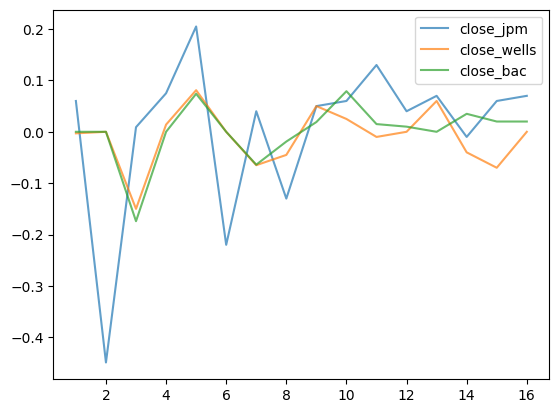

In [43]:
price_diff.plot(y=["close_jpm", "close_wells", "close_bac"], alpha=0.7)
plt.show()
# Conclusion:
# During this period, the price change for these bank stocks was roughly the same, 
# although the price change for _JP Morgan_ was more variable. 
# The critical point here is that the merge_asof() function is very useful 
# in performing the fuzzy matching between the timestamps of all the tables.

#### Using `merge_asof()` to Study Recession Periods
##### Story:
The `merge_asof()` function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. `gdp` is a table of quarterly GDP values of the US during the 1980s. Additionally, the table `recession` holds the starting date of every US recession since 1980, and the date when the recession was declared to be over.

         date       gdp econ_status
0  1979-01-01  2526.610         NaN
1  1979-04-01  2591.247         NaN
2  1979-07-01  2667.565         NaN
3  1979-10-01  2723.883         NaN
4  1980-01-01  2789.842   recession
5  1980-04-01  2797.352   recession
6  1980-07-01  2856.483   recession
7  1980-10-01  2985.557      normal
8  1981-01-01  3124.206      normal
9  1981-04-01  3162.532      normal
10 1981-07-01  3260.609   recession
11 1981-10-01  3280.818   recession
12 1982-01-01  3274.302   recession
13 1982-04-01  3331.972   recession
14 1982-07-01  3366.322   recession
15 1982-10-01  3402.561   recession
16 1983-01-01  3473.413      normal
17 1983-04-01  3578.848      normal
18 1983-07-01  3689.179      normal
19 1983-10-01  3794.706      normal
20 1984-01-01  3908.054      normal
21 1984-04-01  4009.601      normal
22 1984-07-01  4084.250      normal
23 1984-10-01  4148.551      normal


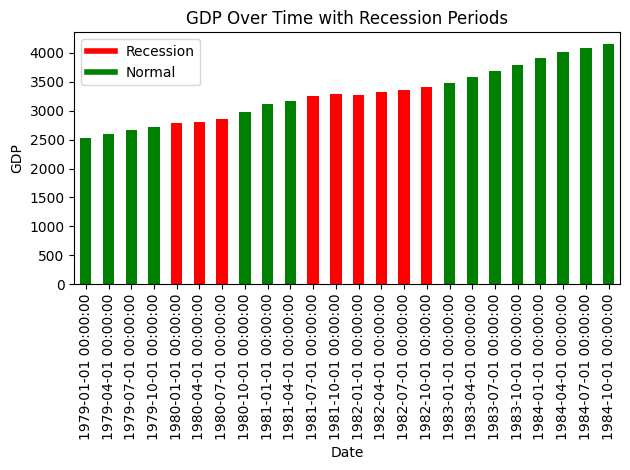

In [44]:
gdp = pd.DataFrame({
	"date": pd.to_datetime([
		"1979-01-01", "1979-04-01", "1979-07-01", "1979-10-01", "1980-01-01", "1980-04-01",
		"1980-07-01", "1980-10-01", "1981-01-01", "1981-04-01", "1981-07-01", "1981-10-01",
		"1982-01-01", "1982-04-01", "1982-07-01", "1982-10-01", "1983-01-01", "1983-04-01",
		"1983-07-01", "1983-10-01", "1984-01-01", "1984-04-01", "1984-07-01", "1984-10-01"
	]),
	"gdp": [
		2526.610, 2591.247, 2667.565, 2723.883, 2789.842, 2797.352, 2856.483, 2985.557,
		3124.206, 3162.532, 3260.609, 3280.818, 3274.302, 3331.972, 3366.322, 3402.561,
		3473.413, 3578.848, 3689.179, 3794.706, 3908.054, 4009.601, 4084.250, 4148.551
	]
})

recession = pd.DataFrame({
	"date": pd.to_datetime([
		"1980-01-01", "1980-08-01", "1981-07-01", "1982-12-01", "1990-07-01",
		"1991-04-01", "2001-03-01", "2001-12-01", "2007-12-01", "2009-07-01"
	]),
	"econ_status": [
		"recession", "normal", "recession", "normal", "recession",
		"normal", "recession", "normal", "recession", "normal"
	]
})

gdp_recession = pd.merge_asof(gdp, recession, on="date")
print(gdp_recession)

# create a color list
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

gdp_recession.plot(kind="bar", y="gdp", x="date", color=is_recession, rot=90)

# Create custom legends
recession_patch = plt.Line2D([0], [0], color='r', lw=4, label='Recession')
normal_patch = plt.Line2D([0], [0], color='g', lw=4, label='Normal')

# Add legends to the plot
plt.legend(handles=[recession_patch, normal_patch])

# Customize the plot
plt.title('GDP Over Time with Recession Periods')
plt.xlabel('Date')
plt.ylabel('GDP')

# Show the plot
plt.tight_layout()
plt.show()